In [240]:
%pip install scikit-learn

#importation des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [241]:
#chargement du dataset
dataf=pd.read_csv("marketing_campaign.csv", sep=";")
dataf.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [242]:
#chargement du dataset
dataf=pd.read_csv("marketing_campaign.csv", sep=";")
dataf.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [243]:
#chargement du dataset et affichage des valeurs manquantes
print("Analyse des valeurs manquantes :")
missing_before = dataf.isnull().sum()
print(missing_before[missing_before > 0])


Analyse des valeurs manquantes :
Income    24
dtype: int64


In [244]:
data=dataf.dropna(subset=['Income'])  # suppression des lignes avec des valeurs manquantes
data.isnull().sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [245]:
#trouver les valeurs manquantes


print(f"Nombre de lingnes avant la suppressions des doublons: {dataf.shape}")
duplicate_rows_count = dataf.duplicated().sum()
 
if duplicate_rows_count > 0:
    print(f"Nombre de lignes dubliqués trouver: {duplicate_rows_count}")
    dataf.drop_duplicates(inplace=True)
    print(f" Nombre final après la suppression des doublons: {dataf.shape}")
else:
    print("Pas de doublon trouvé.")


Nombre de lingnes avant la suppressions des doublons: (2240, 29)
Pas de doublon trouvé.


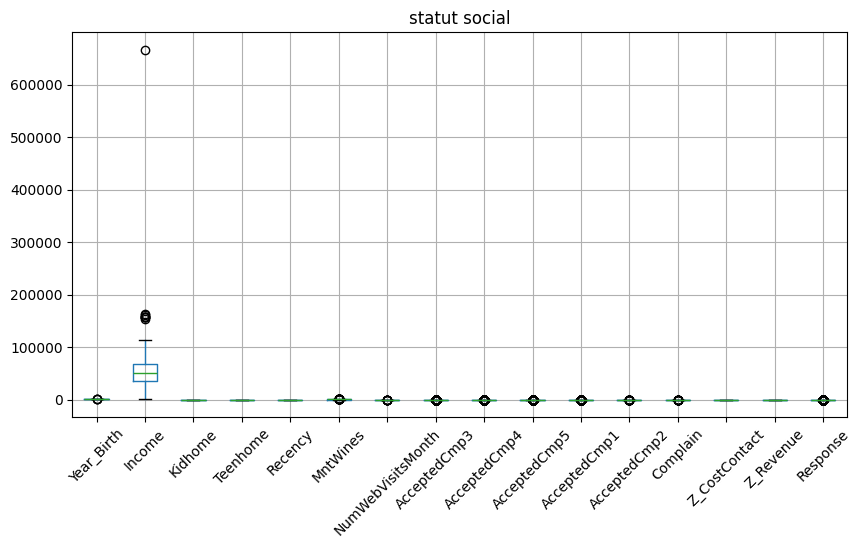

In [246]:
#valeurs abérantes
product_categories = ['Year_Birth',	'Education',	'Marital_Status',	'Income',	'Kidhome',	'Teenhome',	'Dt_Customer',	'Recency'	,'MntWines',		'NumWebVisitsMonth'	,'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5'	,'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue',	'Response']
 
dataf[product_categories].boxplot(figsize=(10,5), rot=45)
plt.title("statut social")
plt.show()
 



In [247]:
# Exemple : current year
current_year = dt.datetime.now().year

# Conversion en datetime et extraction de l'année
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Dt_OlderCustomer'] = current_year - data['Dt_Customer'].dt.year

print(data['Dt_OlderCustomer'])

0       13
1       11
2       12
3       11
4       11
        ..
2235    12
2236    11
2237    11
2238    11
2239    13
Name: Dt_OlderCustomer, Length: 2216, dtype: int32


C:\Users\lamin\AppData\Local\Temp\ipykernel_40312\1214511616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\lamin\AppData\Local\Temp\ipykernel_40312\1214511616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dt_OlderCustomer'] = current_year - data['Dt_Customer'].dt.year


In [248]:
df_cleaned = dataf.copy()
 
df_cleaned = df_cleaned.dropna(subset=['Income'])
 
# encodage Marital_status
marital_status_mapping = {
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3
}
df_cleaned['Marital_Status_Encoded'] = df_cleaned['Marital_Status'].map(marital_status_mapping)
df_cleaned = df_cleaned.drop('Marital_Status', axis=1)
 
 
# encodage Education
education_mapping = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
df_cleaned['Education_Encoded'] = df_cleaned['Education'].map(education_mapping)
df_cleaned = df_cleaned.drop('Education', axis=1)
 
current_year = dt.datetime.now().year
 
 
 
display(X_scaled_df.isnull().sum())

Income                    0
Age                       0
Kidhome                   0
Teenhome                  0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Marital_Status_Encoded    0
Education_Encoded         0
dtype: int64

In [249]:
df_cleaned = df_cleaned.dropna(subset=['Marital_Status_Encoded']).copy()

In [250]:
df_cleaned = df_cleaned.dropna(subset=['Income']).copy()
 
df_cleaned['Age'] = dt.datetime.now().year - df_cleaned['Year_Birth']
 
# Select features for clustering
features = [
    'Income', 'Age', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Marital_Status_Encoded', 'Education_Encoded'
]
X = df_cleaned[features]
 
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
 
 
 
start = time.perf_counter()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit_predict (X_scaled_df)
print(f"inertia sans pca : {kmeans.inertia_:.4f}")
end = time.perf_counter()
print(f"Temps d'exécution sans pca : {end - start:.4f}secondes")
 
 
print("=========== Avec PCA ==========")
pca = PCA(n_components=3)
principal_component= pca.fit_transform(X_scaled_df)
 
start = time.perf_counter()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit_predict (principal_component)
print(f"inertia avec pca : {kmeans.inertia_:.4f}")
end = time.perf_counter()
print(f"Temps d'exécution avec pca : {end - start:.4f} secondes")

inertia sans pca : 24964.1907
Temps d'exécution sans pca : 0.0460secondes
=========== Avec PCA ==========
inertia avec pca : 6912.1527
Temps d'exécution avec pca : 0.0287 secondes


In [251]:
from sklearn.cluster import KMeans
# Suppose que X_scaled contient les variables de dépenses normalisées
inertia = []
K_range = range(2, 11)  # K de 2 à 10
 
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
 
# Affichage de l'inertie pour chaque K
for k, i in zip(K_range, inertia):
    print(f"K = {k} -> Inertie = {i:.2f}")

K = 2 -> Inertie = 28064.26
K = 3 -> Inertie = 24964.28
K = 4 -> Inertie = 23980.65
K = 5 -> Inertie = 23320.32
K = 6 -> Inertie = 21734.88
K = 7 -> Inertie = 21155.57
K = 8 -> Inertie = 20552.80
K = 9 -> Inertie = 20131.93
K = 10 -> Inertie = 19821.84


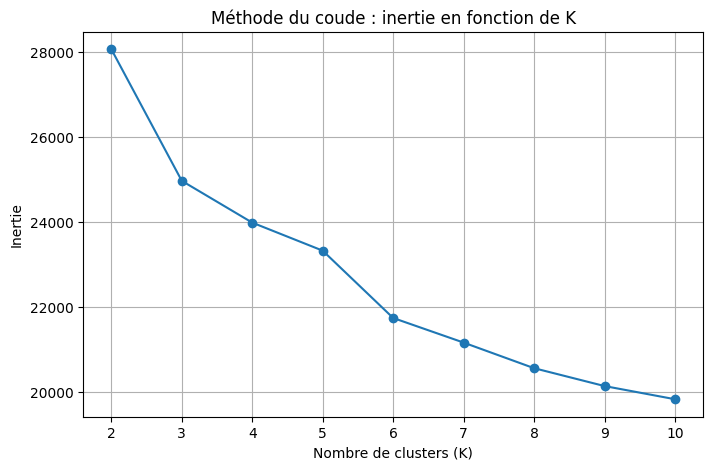

In [252]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude : inertie en fonction de K")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [253]:
#Methode de silhouette
from sklearn.metrics import silhouette_score
 
# Supposons que X_scaled contient les variables normalisées
k_range = range(2, 11)  # K = 2 à 10
silhouette_scores = []
 
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)  # attribution des clusters
    score = silhouette_score(X_scaled, labels)  # calcul du score moyen
    silhouette_scores.append(score)
    print(f"K = {k} -> Score de silhouette moyen = {score:.4f}")

K = 2 -> Score de silhouette moyen = 0.2688
K = 3 -> Score de silhouette moyen = 0.1989
K = 4 -> Score de silhouette moyen = 0.1855
K = 5 -> Score de silhouette moyen = 0.1671
K = 6 -> Score de silhouette moyen = 0.1251
K = 7 -> Score de silhouette moyen = 0.1247
K = 8 -> Score de silhouette moyen = 0.1167
K = 9 -> Score de silhouette moyen = 0.1182
K = 10 -> Score de silhouette moyen = 0.1133


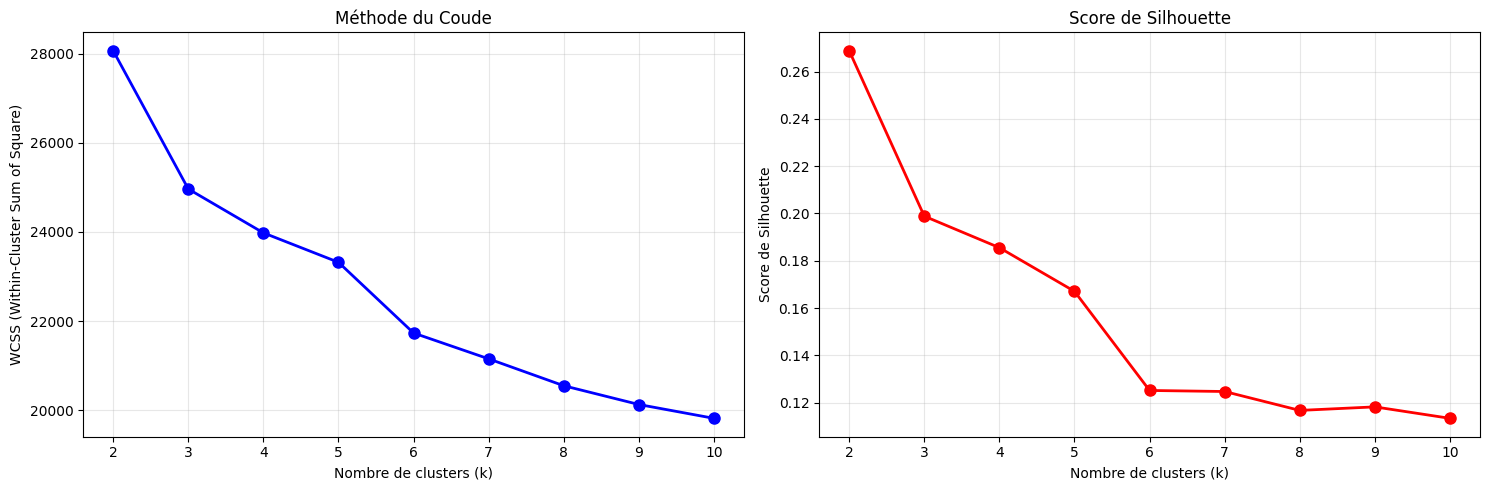

In [254]:
from sklearn.metrics import silhouette_score

# Supposons que X_scaled contient les variables normalisées
 
k_range = range(2, 11)  # K = 2 à 10

wcss = []

silhouette_scores = []
 
for k in k_range:

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

    labels = kmeans.fit_predict(X_scaled)

    wcss.append(kmeans.inertia_)

    silhouette_scores.append(silhouette_score(X_scaled, labels))
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)

ax1.set_xlabel('Nombre de clusters (k)')

ax1.set_ylabel('WCSS (Within-Cluster Sum of Square)')

ax1.set_title('Méthode du Coude')

ax1.grid(True, alpha=0.3)
 
 
# Score de silhouette

ax2.plot(range(2, 11), silhouette_scores, 'ro-', linewidth=2, markersize=8)

ax2.set_xlabel('Nombre de clusters (k)')

ax2.set_ylabel('Score de Silhouette')

ax2.set_title('Score de Silhouette')

ax2.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

#ici dans notre cas on a k = 3
 
 

K = 2 -> Davies-Bouldin Index = 1.5806
K = 3 -> Davies-Bouldin Index = 1.8908
K = 4 -> Davies-Bouldin Index = 2.3808
K = 5 -> Davies-Bouldin Index = 2.3701
K = 6 -> Davies-Bouldin Index = 2.3325
K = 7 -> Davies-Bouldin Index = 2.2975
K = 8 -> Davies-Bouldin Index = 2.2508
K = 9 -> Davies-Bouldin Index = 2.2341
K = 10 -> Davies-Bouldin Index = 2.2613


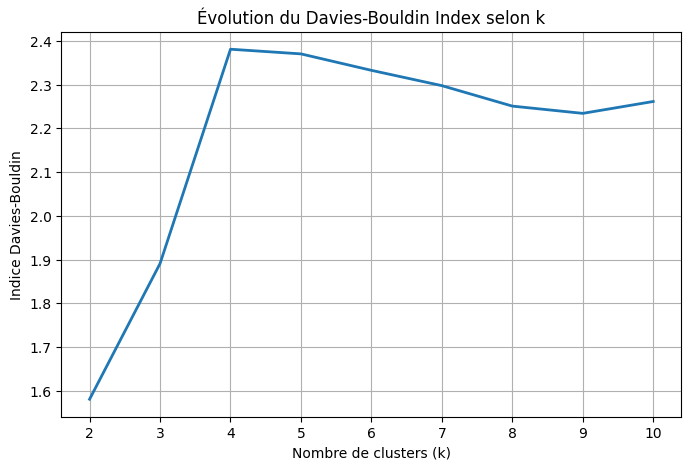

In [255]:
from sklearn.metrics import davies_bouldin_score
 
# Supposons que X_scaled contient les variables normalisées

k_range = range(2, 11)  # K = 2 à 10

dbi_scores = []
 
for k in k_range:

    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

    labels = kmeans.fit_predict(X_scaled)

    dbi = davies_bouldin_score(X_scaled, labels)

    dbi_scores.append(dbi)

    print(f"K = {k} -> Davies-Bouldin Index = {dbi:.4f}")

 


plt.figure(figsize=(8, 5))

plt.plot(list(k_range), dbi_scores, linewidth=2, markersize=8)

plt.xlabel('Nombre de clusters (k)')

plt.ylabel('Indice Davies-Bouldin')

plt.title('Évolution du Davies-Bouldin Index selon k')

plt.grid(True)

plt.show()
 

(2133, 18)
(2133, 2)


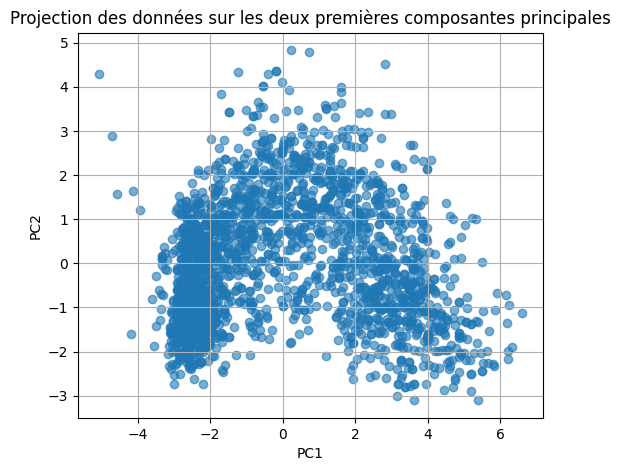

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
# Scale the data before applying PCA
scheduler = StandardScaler()
X_scaled = scheduler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled_df)
 
# use the defined dataframe X instead of undefined df
print(X.shape)
print(principal_components.shape)
 
plt.figure(figsize=(6, 5))
# 'labels' variable is not defined, commenting it out for now. It can be added back after clustering.
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.6)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
 

In [257]:
#Enregistrer les modèles
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
 
print("Modèles enregistrés avec succès !")


Modèles enregistrés avec succès !
